In [1]:
import arrow
import json
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

In [12]:
with open('backupWithCo2.jsonr', 'r') as f:
    obj = map(json.loads, f.readlines())
print '%d objects loaded' % len(obj)

7339 objects loaded


In [13]:
country_codes = [
    'AT',
    'BE',
    'BG',
    'BA',
    'BY',
    'CH',
    'CZ',
    'DE',
    'DK',
    'ES',
    'EE',
    'FI',
    'FR',
    'GB',
    'GR',
    'HR',
    'HU',
    'IE',
    'IS',
    'IT',
    'LT',
    'LU',
    'LV',
    'MD',
    'NL',
    'NO',
    'PL',
    'PT',
    'RO',
    'RU',
    'RS',
    'SK',
    'SI',
    'SE',
    'UA'
];

In [14]:
def parse_entry(entry):
    vector = []
    dt = None
    for country_code in country_codes:
        country_data = entry.get(country_code, None)
        if country_data:
            if not dt: dt = arrow.get(country_data['data']['datetime']['$date']).datetime
            vector += [country_data['data']['co2intensity']]
        else: vector += [None]
      
    vector.insert(0, dt)
    return vector

In [15]:
data = np.array(map(parse_entry, obj))
#data = data[35:]

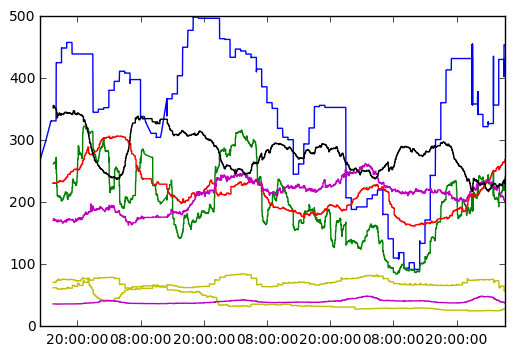

In [16]:
plt.plot(data[:,0], data[:, 1:]);